In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
def plot_correlation_map( df ):
    corr = merge_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
#from kaggle.com "Titanic An Interactive Data Science Tutorial"

In [3]:
bmx_df = pd.read_csv('csv/bmx_i.csv')
# ^ body measurements file
demo_df = pd.read_csv('csv/demo_i.csv')
# ^ demographics data

In [4]:
bmx_df.columns.values

array(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM',
       'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC',
       'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC',
       'BMXWAIST', 'BMIWAIST', 'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4',
       'BMDAVSAD', 'BMDSADCM'], dtype=object)

In [5]:
demo_df.columns.values

array(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ',
       'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3',
       'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG',
       'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ',
       'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR',
       'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2',
       'INDFMPIR'], dtype=object)

In [6]:
bmx_df = bmx_df.drop(['BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMDBMIC', 'BMIHT', 'BMILEG', 'BMIARML',
    'BMIARMC', 'BMIWAIST', 'BMDSADCM',
    'BMDSTATS', 'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMIWT',
                     ], axis=1)
demo_df = demo_df.drop(['SDDSRVYR', 'RIDSTATR', 'RIDAGEMN', 'RIDRETH1', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
    'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
    'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
    'DMDHRBR4', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR',
    'DMDHRGND', 'DMDHRAGE', 'DMDHREDU', 'DMDHRMAR','DMDHSEDU', 'DMDMARTL', 'DMDEDUC3', 'DMDEDUC2',               
                    ], axis=1)

In [7]:
merge_df = pd.merge(demo_df, bmx_df, how='inner')

In [8]:
merge_df.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD
count,1.116800e+04,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000
mean,7.581835e+04,1.581304,30.727077,3.184456,52.829137,145.761372,23.509653,29.805704,31.404576,26.726254,76.058363,15.758301
std,3.138974e+04,0.493368,22.989024,1.553500,37.349890,44.855141,9.710888,16.082163,9.843889,9.511057,33.669808,9.584680
min,3.687825e-40,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.495375e+04,1.000000,11.000000,2.000000,16.200000,146.600000,19.400000,30.875000,30.000000,22.300000,65.000000,13.200000
50%,8.787650e+04,2.000000,24.000000,3.000000,58.800000,162.800000,22.400000,37.600000,33.800000,26.700000,77.600000,16.900000
75%,9.079325e+04,2.000000,48.000000,4.000000,80.000000,167.900000,29.000000,39.400000,37.400000,32.900000,98.500000,22.300000
max,9.370200e+04,2.000000,80.000000,7.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,40.800000


In [9]:
merge_df.columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXWT', 'BMXHT',
       'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BMDAVSAD'], dtype=object)

# Dictionary

- SEQN = respondant sequence number
- RIAGENDR = gender (1=male, 2=female)
- RIDAGEYR = age
- RIDRETH3 = race (1=MexicanAmerican, 2=Other Hispanic, 3=Non-Hispanic White, 4=Non-Hispanic Black, 6=Non-Hispanic Asian, 7=Other inc. multi-racial)
- DMDEDUC3 = education6-19 (0=none/kindergarten, 1=1st, 2=2nd, 3=3rd, 4=4th, 5=5th, 6=6th, 7=7th, 8=8th, 9=9th, 10=10th, 11=11th, 12=12th, 13=HSGraduate, 14=GED or equiv, 15=More than HS, 55=lessthan5th, 66=lessthann9th, 77=refused, 99=don'tknow, .=missing
- DMDEDUC2 = education20+ (1=lessthan9th, 2=9-11th/12th w/ no diploma, 3=HS grad or GED, 4=Some college/AA equiv, 5=College grad, 7=refused, 9=don't know, .=missing
- DMDMARTL = marital status (1=married, 2=widowed, 3=divorced, 4=seperated, 5=nvr married, 6=living w/ partner, 77 = refused, 99=don't know

- BMXWT = weight (KG)
- BMXHT = height (cm)
- BMXBMI = BMI (kg/m**2)
- BMXLEG = upper leg length(cm)
- BMXARML = upper arm length(cm)
- BMXARMC = arm circumference(cm)
- BMXWASIT = waist circumference(cm)
- BMXSAD1-4 = sagittal abdominal diameter (cm)
- BMXAVSAD = avg. sagittal abdominal diameter (cm) good <=25cm; bad >=30cm

# Fixing category values

In [10]:
merge_df = pd.get_dummies(merge_df,columns=["RIDRETH3", "RIAGENDR"], drop_first=True )

In [11]:
merge_df.columns.values

array(['SEQN', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML',
       'BMXARMC', 'BMXWAIST', 'BMDAVSAD', 'RIDRETH3_2', 'RIDRETH3_3',
       'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2'], dtype=object)

# Dropping values from features

In [12]:
merge_df[merge_df['RIDAGEYR'] <= 7] = np.NaN
merge_df[merge_df['BMXWT'] <= 1] = np.NaN
merge_df[merge_df['BMXHT'] <= 0] = np.NaN
merge_df[merge_df['BMXBMI'] <= 0] = np.NaN
merge_df[merge_df['BMXLEG'] <= 0] = np.NaN
merge_df[merge_df['BMXARML'] <= 0] = np.NaN
merge_df[merge_df['BMXARMC'] <= 0] = np.NaN
merge_df[merge_df['BMXWAIST'] <= 0] = np.NaN
merge_df[merge_df['BMDAVSAD'] <= 0] = np.NaN

merge_df = merge_df.dropna()

merge_df.describe()

,SEQN,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,RIAGENDR_2
count,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000
mean,88726.754813,38.608771,73.888710,162.997988,27.316949,38.124663,36.166811,31.229975,93.146374,21.228745,0.133594,0.314228,0.214069,0.111304,0.042264,0.502678
std,2876.609802,22.020979,24.364478,13.005450,7.267979,4.165021,3.581956,6.084942,19.279862,4.977972,0.340240,0.464241,0.410204,0.314531,0.201205,0.500029
min,83732.000000,8.000000,17.700000,111.800000,12.300000,24.000000,22.500000,15.200000,45.200000,9.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86229.000000,17.000000,58.200000,155.600000,22.100000,35.300000,34.000000,27.100000,79.200000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88743.000000,37.000000,72.300000,163.900000,26.500000,38.300000,36.500000,31.200000,93.000000,20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,91217.000000,57.000000,88.200000,172.000000,31.400000,41.000000,38.600000,35.300000,105.600000,24.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,93702.000000,80.000000,198.900000,202.700000,64.600000,51.100000,47.400000,54.400000,171.600000,40.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizing Heat Maps

In [13]:
merge_df.head()

,SEQN,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,RIAGENDR_2
0,83732.0,62.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,22.8,0.0,1.0,0.0,0.0,0.0,0.0
1,83733.0,53.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,27.3,0.0,1.0,0.0,0.0,0.0,0.0
2,83734.0,78.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,26.6,0.0,1.0,0.0,0.0,0.0,0.0
3,83735.0,56.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,25.1,0.0,1.0,0.0,0.0,0.0,1.0
5,83737.0,72.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,23.1,0.0,0.0,0.0,0.0,0.0,1.0


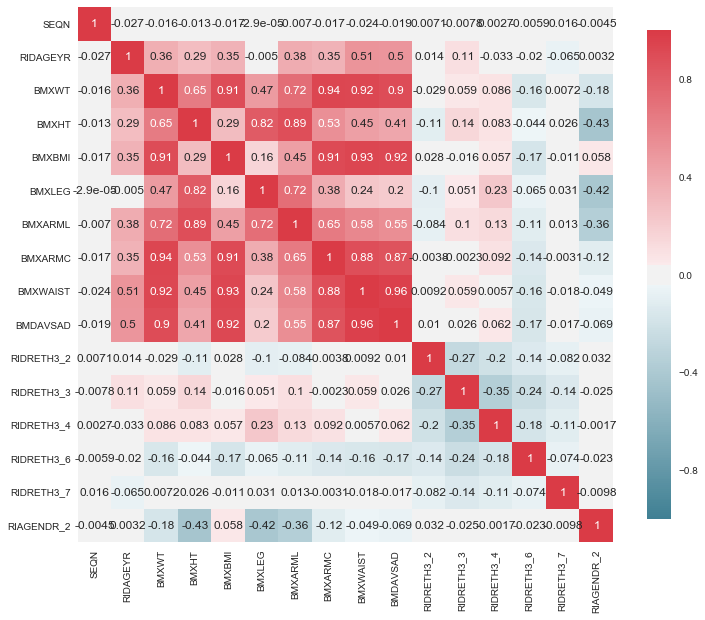

In [14]:
plot_correlation_map(merge_df)

In [15]:
merge_df[['RIDAGEYR', 'BMDAVSAD']].groupby(['RIDAGEYR'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,RIDAGEYR,BMDAVSAD
0,8.0,14.323041
1,9.0,14.911282
2,10.0,15.811765
3,11.0,16.466667
4,12.0,17.193377
5,13.0,17.532143
6,14.0,18.173964
7,15.0,18.310256
8,16.0,18.520000
9,17.0,19.000000


In [16]:
merge_df[['BMXWT', 'BMDAVSAD']].groupby(['BMXWT'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXWT,BMDAVSAD
0,17.7,9.800000
1,17.9,11.200000
2,19.2,12.800000
3,20.1,12.450000
4,20.3,11.600000
5,20.7,10.900000
6,20.9,13.100000
7,21.4,12.800000
8,21.5,9.600000
9,21.6,10.600000


In [17]:
merge_df[['BMXBMI', 'BMDAVSAD']].groupby(['BMXBMI'], as_index=False).mean()#.sort_values(by='BMXBMI', ascending=False)

,BMXBMI,BMDAVSAD
0,12.3,10.500000
1,12.7,13.100000
2,12.9,10.900000
3,13.1,12.400000
4,13.3,11.300000
5,13.4,11.550000
6,13.5,10.800000
7,13.7,11.350000
8,13.8,12.200000
9,13.9,11.433333


In [18]:
merge_df[['BMXLEG', 'BMDAVSAD']].groupby(['BMXLEG'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXLEG,BMDAVSAD
0,24.0,12.800000
1,25.2,12.000000
2,25.3,13.000000
3,25.4,9.800000
4,25.5,12.300000
5,26.0,26.400000
6,26.2,13.000000
7,26.3,10.600000
8,26.4,24.200000
9,26.5,11.933333


In [19]:
merge_df[['BMXARML', 'BMDAVSAD']].groupby(['BMXARML'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXARML,BMDAVSAD
0,22.5,12.800000
1,23.0,9.600000
2,23.5,12.000000
3,24.0,14.250000
4,24.5,13.100000
5,24.6,10.200000
6,24.8,11.600000
7,25.0,12.366667
8,25.2,12.375000
9,25.3,13.350000


In [20]:
merge_df[['BMXARMC', 'BMDAVSAD']].groupby(['BMXARMC'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXARMC,BMDAVSAD
0,15.2,11.400000
1,15.4,9.800000
2,16.4,10.900000
3,16.5,12.400000
4,16.6,11.500000
5,16.7,12.750000
6,16.8,10.800000
7,16.9,12.450000
8,17.0,11.700000
9,17.1,18.300000


In [21]:
merge_df[['BMXWAIST', 'BMDAVSAD']].groupby(['BMXWAIST'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXWAIST,BMDAVSAD
0,45.2,9.800000
1,48.9,11.200000
2,49.1,11.600000
3,49.5,10.900000
4,49.9,10.600000
5,50.9,11.500000
6,51.0,13.900000
7,51.1,11.600000
8,51.5,11.325000
9,51.7,11.600000


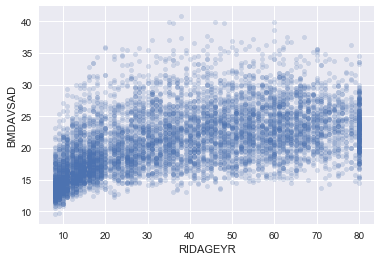

In [22]:
merge_df.plot(kind='scatter', x='RIDAGEYR', y='BMDAVSAD', alpha=0.2)

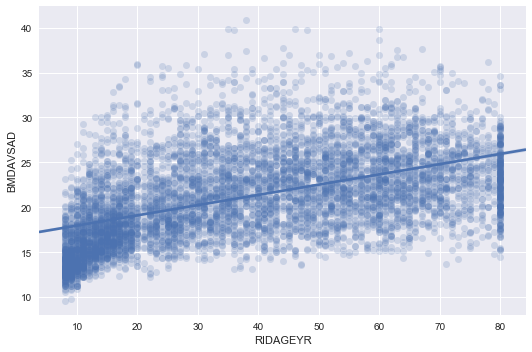

In [23]:
sns.lmplot(x='RIDAGEYR', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

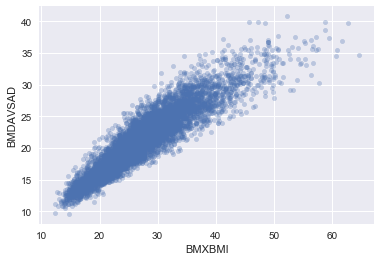

In [24]:
merge_df.plot(kind='scatter', x='BMXBMI', y='BMDAVSAD', alpha=0.3)

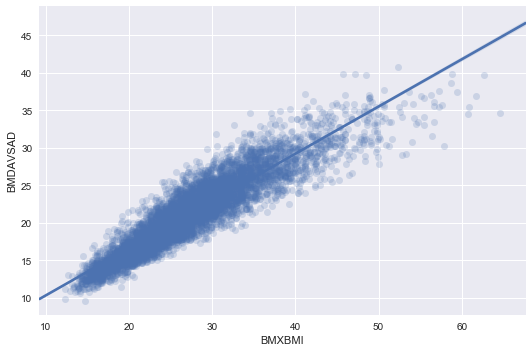

In [25]:
sns.lmplot(x='BMXBMI', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

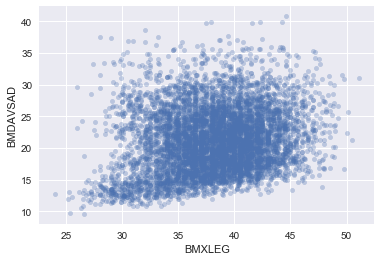

In [26]:
merge_df.plot(kind='scatter', x='BMXLEG', y='BMDAVSAD', alpha=0.3)

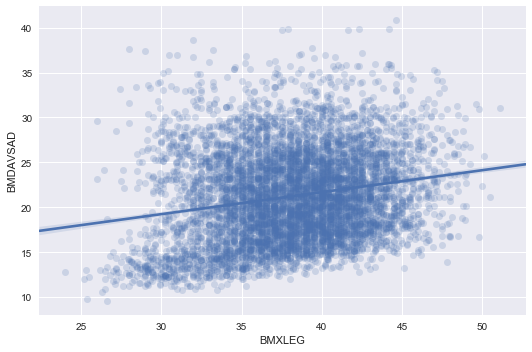

In [27]:
sns.lmplot(x='BMXLEG', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

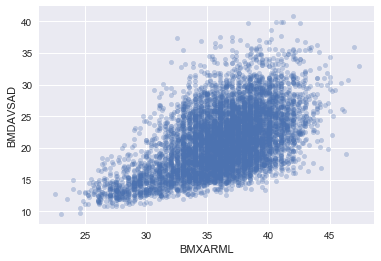

In [28]:
merge_df.plot(kind='scatter', x='BMXARML', y='BMDAVSAD', alpha=0.3)

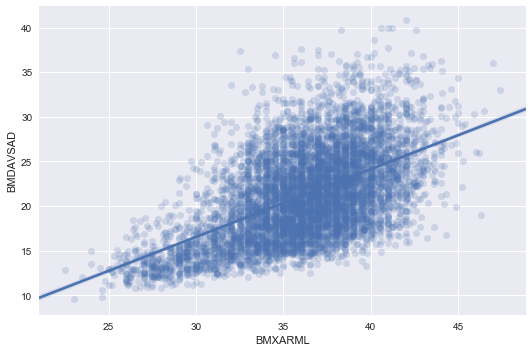

In [29]:
sns.lmplot(x='BMXARML', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

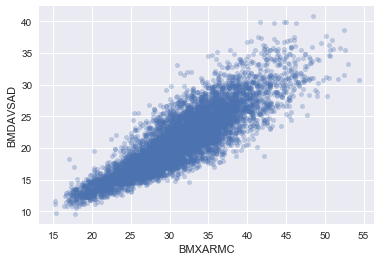

In [30]:
merge_df.plot(kind='scatter', x='BMXARMC', y='BMDAVSAD', alpha=0.3)

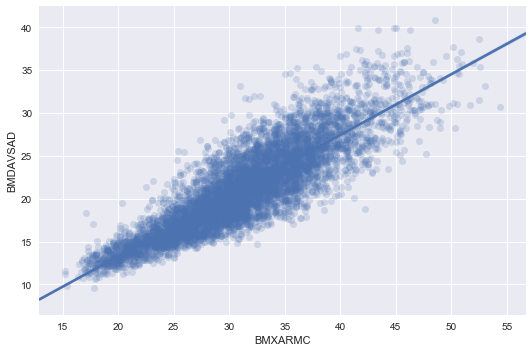

In [31]:
sns.lmplot(x='BMXARMC', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

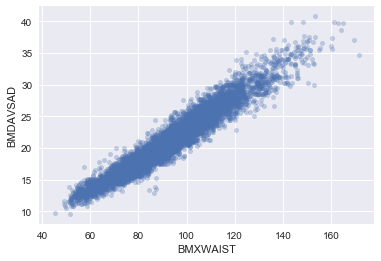

In [32]:
merge_df.plot(kind='scatter', x='BMXWAIST', y='BMDAVSAD', alpha=0.3)

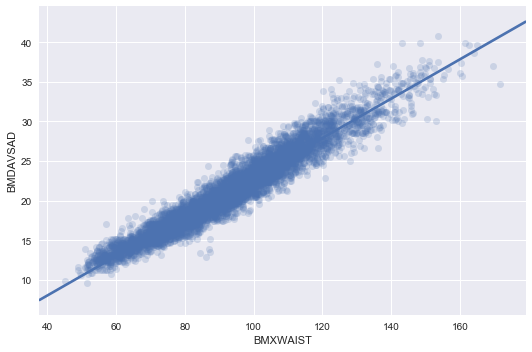

In [33]:
sns.lmplot(x='BMXWAIST', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

In [34]:
train_df, test_df = train_test_split(merge_df, test_size=0.2)

In [35]:
print merge_df.shape, train_df.shape, test_df.shape



(6909, 16) (5527, 16) (1382, 16)


In [36]:
X_train = train_df.drop(['SEQN', 'BMDAVSAD'], axis=1)
Y_train = train_df['BMDAVSAD']
X_test = test_df.drop(['SEQN', 'BMDAVSAD'], axis=1)
Y_test = test_df['BMDAVSAD']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5527, 14), (5527,), (1382, 14), (1382,))

# Linear Regression

In [37]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
assorted_pred = linreg.predict(X_test)
acc_lin = round(linreg.score(X_train, Y_train) * 100, 2)
acc_lin


94.1

In [38]:
acc_lin_test = round(linreg.score(X_test, Y_test) * 100, 2)
acc_lin_test


93.93

In [39]:
coeff_df = pd.DataFrame(train_df.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(linreg.coef_)

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,RIDRETH3_2,0.736925
12,RIDRETH3_4,0.191280
7,BMXARMC,0.178395
3,BMXHT,0.102555
8,BMXWAIST,0.065419
1,RIDAGEYR,0.037650
0,SEQN,0.013454
2,BMXWT,-0.009539
9,BMDAVSAD,-0.011426
5,BMXLEG,-0.016932


# Support Vector Machines

In [40]:
# Support Vector Machines

svr = SVR()
svr.fit(X_train, Y_train)
Y_pred = svr.predict(X_test)
acc_svr = round(svr.score(X_train, Y_train) * 100, 2)
acc_svr

54.52

In [41]:
acc_svr_test = round(svr.score(X_test, Y_test) * 100, 2)
acc_svr_test

38.13

# KNN

In [68]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

95.13

In [69]:
acc_knn_test = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn_test

92.62

In [70]:
scores = cross_val_score(knn, X_test, Y_test, cv=10)
print scores

[ 0.92237604  0.91718725  0.91392593  0.90452823  0.92201405  0.92125456
  0.91405431  0.92573319  0.92588195  0.91277562]


In [71]:
from sklearn.model_selection import GridSearchCV

knn.get_params().keys()

['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [74]:
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([31])
grid = GridSearchCV(knn, param_grid=dict(alpha=alphas))
grid.fit(X_test, Y_test)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

ValueError: Invalid parameter alpha for estimator KNeighborsRegressor. Check the list of available parameters with `estimator.get_params().keys()`.

# Linear SVR

In [ ]:
linear_svr = LinearSVR()
linear_svr.fit(X_train, Y_train)
Y_pred = linear_svr.predict(X_test)
acc_linear_svr = round(linear_svr.score(X_train, Y_train) * 100, 2)
acc_linear_svr

In [ ]:
acc_linear_svr_test = round(linear_svr.score(X_test, Y_test) * 100, 2)
acc_linear_svr_test

# Decision Tree

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree_test

# Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest_test

# Comparing Prediction Scores

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Linear Regression',
             'Random Forest',
             'Linear SVR',
             'Decision Tree'],
    'Score - Train': [acc_svr, acc_knn, acc_lin, acc_random_forest,
             acc_linear_svr,
             acc_decision_tree],
    'Score - Test': [acc_svr_test, acc_knn_test, acc_lin_test, acc_random_forest_test,
             acc_linear_svr_test,
             acc_decision_tree_test]})
models.sort_values(by='Score - Test', ascending=False)

# Trying Neural Nets

In [ ]:
X = np.array(train_df.drop('BMDAVSAD', axis=1))
y = np.array(train_df['BMDAVSAD'])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.model_selection as cv

In [ ]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(units=500, input_dim=264))
model.add(Activation("tanh"))

model.add(Dense(units=264, input_dim=500))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(units=3, input_dim=264))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, nb_epoch=1000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")